# Initializing Setup

In [1]:
import pandas as pd

In [2]:
from pycaret.datasets import get_data
employee_df = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
employee_df.shape

(14999, 10)

In [4]:
train_df = employee_df.iloc[:14000, :]
prediction_df = employee_df.iloc[14000:, :]

In [5]:
train_df.shape

(14000, 10)

In [6]:
train_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
13995,0.72,0.88,3,189,3,1,0,management,high,0
13996,0.53,0.91,4,167,4,0,0,management,high,0
13997,0.81,0.80,5,132,2,1,0,management,high,0
13998,0.58,0.90,3,209,2,0,0,management,high,0


In [7]:
prediction_df.shape

(999, 10)

In [8]:
prediction_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
14000,0.72,0.99,4,239,3,0,0,marketing,medium,0
14001,0.90,0.54,4,172,4,0,0,sales,medium,0
14002,0.98,0.91,3,188,4,0,0,accounting,medium,0
14003,0.56,0.74,3,265,3,0,0,support,medium,0
14004,0.77,0.82,3,153,3,1,0,technical,medium,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [9]:
true_labels = prediction_df['left']

In [10]:
true_labels

14000    0
14001    0
14002    0
14003    0
14004    0
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 999, dtype: int64

In [11]:
true_labels.shape

(999,)

In [12]:
prediction_df = prediction_df.drop(['left'], axis=1)

In [13]:
prediction_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
14000,0.72,0.99,4,239,3,0,0,marketing,medium
14001,0.90,0.54,4,172,4,0,0,sales,medium
14002,0.98,0.91,3,188,4,0,0,accounting,medium
14003,0.56,0.74,3,265,3,0,0,support,medium
14004,0.77,0.82,3,153,3,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [14]:
from pycaret import classification

In [15]:
classification_setup = classification.setup(data= train_df, target='left')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6517
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14000, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None



# Compare Models


In [16]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.9828,0.9893,0.9348,0.9776,0.9556,0.9449
1,Random Forest Classifier,0.9821,0.9818,0.9245,0.9848,0.9535,0.9424
2,CatBoost Classifier,0.9818,0.9891,0.9312,0.9764,0.9532,0.9419
3,Extra Trees Classifier,0.9794,0.9867,0.9332,0.9621,0.9473,0.9345
4,Gradient Boosting Classifier,0.9768,0.9848,0.9148,0.967,0.94,0.9257
5,Extreme Gradient Boosting,0.9756,0.9852,0.9066,0.9688,0.9365,0.9214
6,Decision Tree Classifier,0.9733,0.9625,0.9445,0.923,0.9334,0.9167
7,Ada Boost Classifier,0.9594,0.9791,0.8804,0.9129,0.896,0.8708
8,K Neighbors Classifier,0.941,0.9623,0.8753,0.8367,0.8552,0.8182
9,Logistic Regression,0.8917,0.9304,0.7258,0.7285,0.7269,0.6594


# Create Model

In [17]:
classification_rf = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9745,0.9754,0.9072,0.9617,0.9337,0.9179
1,0.9898,0.9873,0.9590,0.9894,0.9740,0.9676
2,0.9867,0.9903,0.9385,0.9946,0.9657,0.9575
3,0.9755,0.9733,0.8923,0.9831,0.9355,0.9204
4,0.9827,0.9872,0.9282,0.9837,0.9551,0.9444
5,0.9776,0.9729,0.9077,0.9779,0.9415,0.9276
6,0.9806,0.9746,0.9179,0.9835,0.9496,0.9376
7,0.9857,0.9945,0.9333,0.9945,0.9630,0.9541
8,0.9908,0.9914,0.9744,0.9794,0.9769,0.9711
9,0.9775,0.9710,0.8866,1.0000,0.9399,0.9261


In [18]:
classification_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6517,
                       verbose=0, warm_start=False)

In [19]:
classification_catboost = classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9806,0.9904,0.9330,0.9679,0.9501,0.9381
1,0.9857,0.9926,0.9436,0.9840,0.9634,0.9545
2,0.9847,0.9912,0.9385,0.9839,0.9606,0.9511
3,0.9796,0.9881,0.9128,0.9834,0.9468,0.9342
4,0.9857,0.9938,0.9436,0.9840,0.9634,0.9545
5,0.9755,0.9809,0.9077,0.9672,0.9365,0.9214
6,0.9776,0.9816,0.9179,0.9676,0.9421,0.9282
7,0.9847,0.9931,0.9487,0.9737,0.9610,0.9515
8,0.9847,0.9960,0.9538,0.9688,0.9612,0.9517
9,0.9796,0.9837,0.9124,0.9833,0.9465,0.9339


In [20]:
classification_catboost

In [21]:
classification_lightgbm = classification.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9816,0.9901,0.9381,0.9681,0.9529,0.9415
1,0.9878,0.9932,0.9538,0.9841,0.9688,0.9611
2,0.9867,0.9894,0.9333,1.0000,0.9655,0.9573
3,0.9765,0.9892,0.9128,0.9674,0.9393,0.9248
4,0.9867,0.9935,0.9436,0.9892,0.9659,0.9577
5,0.9786,0.9851,0.9077,0.9833,0.9440,0.9308
6,0.9816,0.9805,0.9231,0.9836,0.9524,0.9410
7,0.9857,0.9932,0.9590,0.9689,0.9639,0.9550
8,0.9857,0.9957,0.9590,0.9689,0.9639,0.9550
9,0.9765,0.9833,0.9175,0.9622,0.9393,0.9248


In [22]:
classification_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6517, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Hyperparameter Tuning

In [23]:
tune_rf = classification.tune_model('rf',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9735,0.9909,0.8918,0.9719,0.9301,0.9138
1,0.9847,0.9924,0.9333,0.9891,0.9604,0.9509
2,0.9806,0.9909,0.9026,1.0000,0.9488,0.9369
3,0.9745,0.9837,0.8821,0.9885,0.9322,0.9166
4,0.9786,0.9910,0.9077,0.9833,0.9440,0.9308
5,0.9745,0.9884,0.8872,0.9830,0.9326,0.9169
6,0.9765,0.9786,0.8872,0.9943,0.9377,0.9233
7,0.9857,0.9932,0.9282,1.0000,0.9628,0.9539
8,0.9837,0.9953,0.9385,0.9786,0.9581,0.9480
9,0.9765,0.9776,0.8918,0.9886,0.9377,0.9232


In [24]:
tune_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=110, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6517,
                       verbose=0, warm_start=False)

In [25]:
tune_catboost = classification.tune_model('catboost',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9765,0.9910,0.9227,0.9572,0.9396,0.9251
1,0.9878,0.9923,0.9538,0.9841,0.9688,0.9611
2,0.9847,0.9928,0.9333,0.9891,0.9604,0.9509
3,0.9776,0.9842,0.9026,0.9832,0.9412,0.9273
4,0.9857,0.9936,0.9436,0.9840,0.9634,0.9545
5,0.9786,0.9816,0.9128,0.9780,0.9443,0.9311
6,0.9776,0.9797,0.9179,0.9676,0.9421,0.9282
7,0.9857,0.9914,0.9385,0.9892,0.9632,0.9543
8,0.9857,0.9951,0.9641,0.9641,0.9641,0.9552
9,0.9785,0.9830,0.9124,0.9779,0.9440,0.9308


In [26]:
tune_catboost

In [27]:
tune_lightgbm = classification.tune_model('lightgbm',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9796,0.9878,0.9227,0.9728,0.9471,0.9345
1,0.9847,0.9942,0.9385,0.9839,0.9606,0.9511
2,0.9857,0.9941,0.9282,1.0000,0.9628,0.9539
3,0.9786,0.9880,0.9128,0.9780,0.9443,0.9311
4,0.9837,0.9914,0.9333,0.9838,0.9579,0.9478
5,0.9776,0.9862,0.8974,0.9887,0.9409,0.9270
6,0.9786,0.9771,0.8974,0.9943,0.9434,0.9302
7,0.9827,0.9916,0.9385,0.9734,0.9556,0.9448
8,0.9857,0.9945,0.9487,0.9788,0.9635,0.9547
9,0.9785,0.9835,0.9072,0.9832,0.9437,0.9305


In [28]:
tune_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=80,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=120, n_jobs=-1, num_leaves=90, objective=None,
               random_state=6517, reg_alpha=0.2, reg_lambda=0.3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Building Ensemble Models using PyCaret

### https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

## Boosting Ensemble

In [29]:
boosting = classification.ensemble_model(tune_rf, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9827,0.9937,0.9381,0.9733,0.9554,0.9446
1,0.9918,0.9943,0.9744,0.9845,0.9794,0.9743
2,0.9908,0.9924,0.9538,1.0000,0.9764,0.9707
3,0.9827,0.9863,0.9179,0.9944,0.9547,0.9440
4,0.9878,0.9918,0.9436,0.9946,0.9684,0.9608
5,0.9816,0.9896,0.9179,0.9890,0.9521,0.9408
6,0.9857,0.9811,0.9436,0.9840,0.9634,0.9545
7,0.9888,0.9938,0.9538,0.9894,0.9713,0.9643
8,0.9918,0.9969,0.9795,0.9795,0.9795,0.9744
9,0.9816,0.9793,0.9175,0.9889,0.9519,0.9405


## Blending Ensemble

In [30]:
blender = classification.blend_models(estimator_list=[tune_rf, tune_lightgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9735,0.0,0.8918,0.9719,0.9301,0.9138
1,0.9857,0.0,0.9333,0.9945,0.9630,0.9541
2,0.9806,0.0,0.9026,1.0000,0.9488,0.9369
3,0.9755,0.0,0.8821,0.9942,0.9348,0.9198
4,0.9806,0.0,0.9077,0.9944,0.9491,0.9371
5,0.9745,0.0,0.8821,0.9885,0.9322,0.9166
6,0.9776,0.0,0.8872,1.0000,0.9402,0.9265
7,0.9857,0.0,0.9282,1.0000,0.9628,0.9539
8,0.9837,0.0,0.9385,0.9786,0.9581,0.9480
9,0.9765,0.0,0.8918,0.9886,0.9377,0.9232


## Plot Model Results

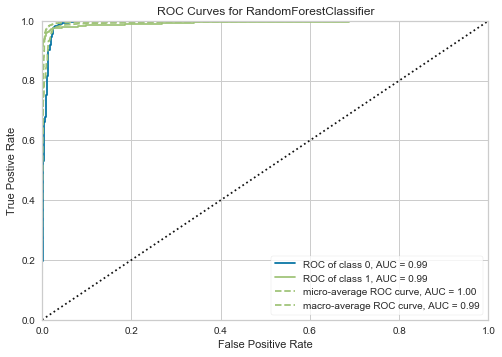

In [31]:
# AUC-ROC plot
classification.plot_model(tune_rf, plot = 'auc')

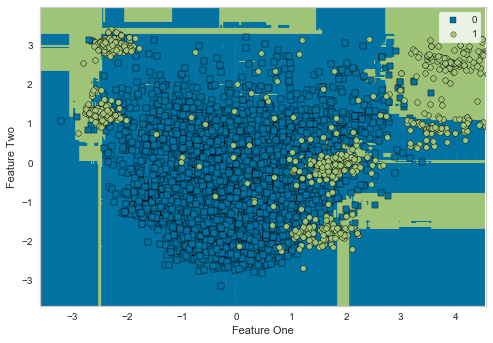

In [32]:
# Decision Boundary
classification.plot_model(tune_rf, plot = 'boundary')

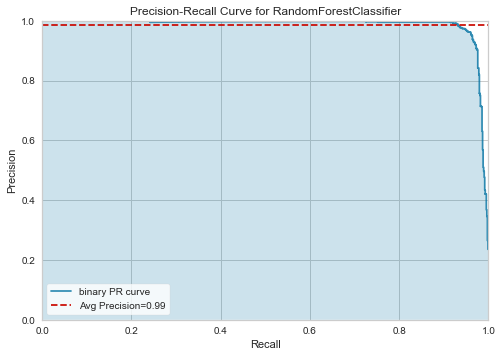

In [33]:
# Precision Recall Curve
classification.plot_model(tune_rf, plot = 'pr')

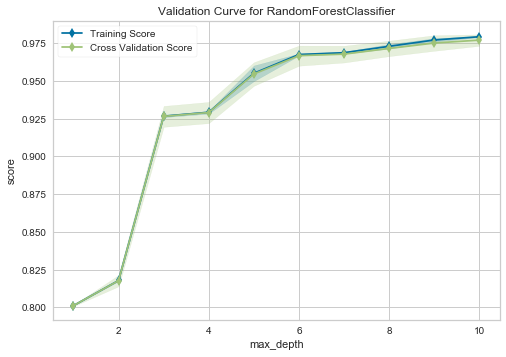

In [34]:
# Validation Curve
classification.plot_model(tune_rf, plot = 'vc')

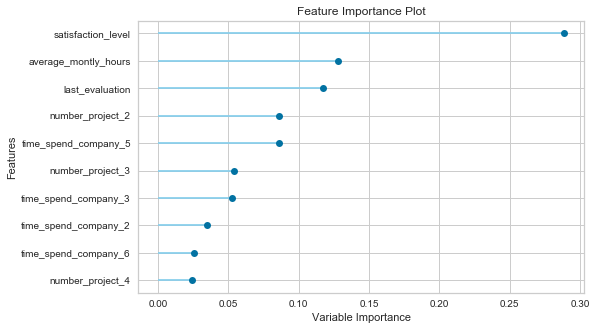

In [35]:
# Dimension Learning
classification.plot_model(tune_rf, plot = 'feature')

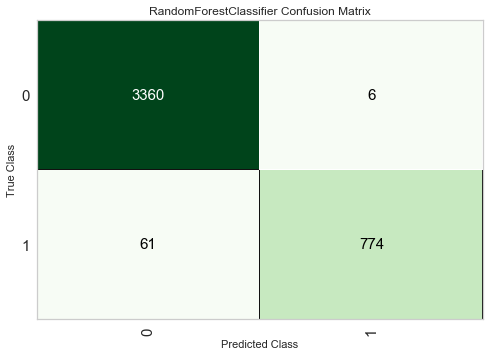

In [36]:
# Confusion Matrix
classification.plot_model(tune_rf, plot = 'confusion_matrix')

## Evaluate our Model

In [37]:
classification.evaluate_model(tune_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpret our Model

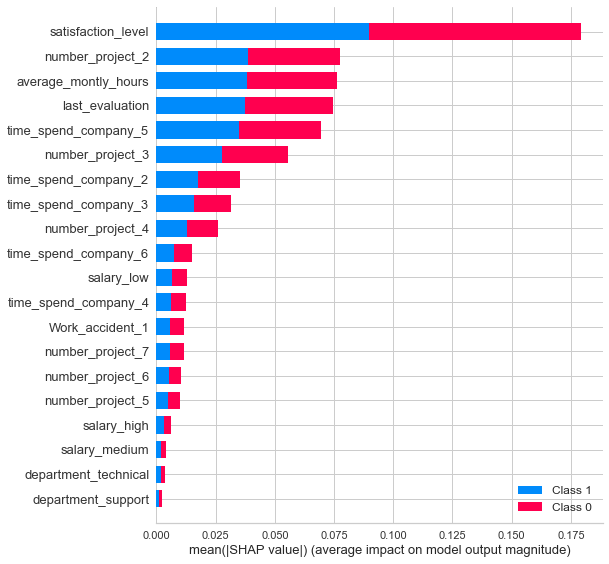

In [38]:
classification.interpret_model(tune_rf)

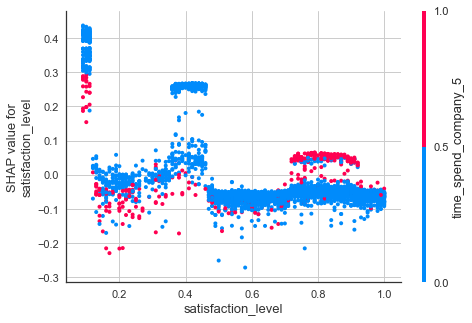

In [39]:
classification.interpret_model(tune_rf,plot='correlation')

In [40]:
predictions = classification.predict_model(tune_rf, data=prediction_df)

In [41]:
predictions

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Label,Score
0,0.72,0.99,4,239,3,0,0,marketing,medium,0,0.0270
1,0.90,0.54,4,172,4,0,0,sales,medium,0,0.0010
2,0.98,0.91,3,188,4,0,0,accounting,medium,0,0.0075
3,0.56,0.74,3,265,3,0,0,support,medium,0,0.0004
4,0.77,0.82,3,153,3,1,0,technical,medium,0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...
994,0.40,0.57,2,151,3,0,0,support,low,1,0.9822
995,0.37,0.48,2,160,3,0,0,support,low,1,0.9946
996,0.37,0.53,2,143,3,0,0,support,low,1,0.9849
997,0.11,0.96,6,280,4,0,0,support,low,1,0.9963


In [42]:
classification.save_model(tune_rf, 'tune_rf_1')

Transformation Pipeline and Model Succesfully Saved


In [43]:
load_tune_rf = classification.load_model(model_name='tune_rf_1')

Transformation Pipeline and Model Sucessfully Loaded


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
predicted_labels = predictions['Label']

In [46]:
predicted_labels

0      0
1      0
2      0
3      0
4      0
      ..
994    1
995    1
996    1
997    1
998    1
Name: Label, Length: 999, dtype: int64

In [47]:
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       211
           1       1.00      0.94      0.97       788

    accuracy                           0.95       999
   macro avg       0.90      0.97      0.93       999
weighted avg       0.96      0.95      0.95       999



In [52]:
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[210,   1],
       [ 51, 737]])